In [ ]:
!mkdir models

!curl --silent --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://github.com/google/mediapipe/blob/master/mediapipe/models/palm_detection.tflite' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/palm_detection.tflite' --output './models/palm_detection.tflite'
!curl --silent --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:69.0) Gecko/20100101 Firefox/69.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://github.com/google/mediapipe/blob/master/mediapipe/models/hand_landmark.tflite' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/hand_landmark.tflite' --output './models/hand_landmark.tflite'
!wget --quiet https://images.theconversation.com/files/144927/original/image-20161107-4704-1mfp474.jpg -O ./data/test_img.jpg

In [2]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [3]:
palm_model_path = "./models/palm_detection.tflite"
landmark_model_path = "./models/hand_landmark.tflite"
anchors_path = "./data/anchors.csv" 

In [4]:
img = cv2.imread('./data/test_img.jpg')[:,:,::-1]

In [5]:
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

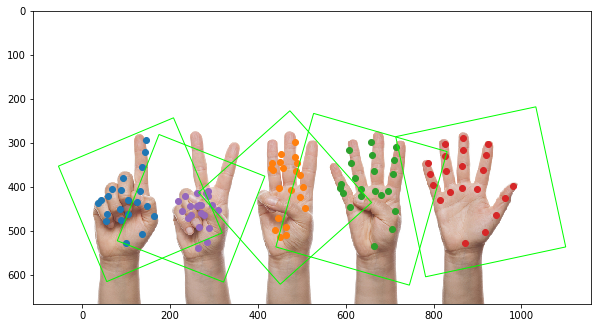

In [6]:
hands = detector(img)

f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

for h in hands:
    kp = h['joints']
    box = h['bbox']
    ax.scatter(kp[:,0], kp[:,1])
    ax.add_patch(Polygon(box, color="#00ff00", fill=False))